# Plot for E-GEOD-33245 (cbrB vs WT)

This notebook is creating volcano plots that highlight the ArgR regulon, which are the genes selected based on the SOPHIE analysis to be specific. These plots will correspond to the wet lab experiments conducted by the Hogan Lab.

In [1]:
%load_ext autoreload

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ponyo import utils

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_pseudomonas_33245.tsv")
)

params = utils.read_config(config_filename)

In [3]:
# Load config params
local_dir = params["local_dir"]
dataset_name = params["dataset_name"]
project_id = params["project_id"]
num_simulated = params["num_simulated"]

In [4]:
# Load DE stats
template_summary_filename = os.path.join(
    base_dir, dataset_name, f"generic_gene_summary_{project_id}_cbrB_v_WT.tsv"
)

In [5]:
# Load argR genes
# These were the selected specific genes used in the wet lab experiments
argR_genes_filename = os.path.join("data", "ArgR.csv")

In [6]:
argR_genes = list(pd.read_csv(argR_genes_filename, index_col=0, header=0).index)

## Plotting functions

In [7]:
def make_volcano_template_highlight_genelist(
    template_summary_filename,
    project_id,
    y_stat,
    genes_to_highlight,
    output_figure_filename,
):
    """
    This function creates volcano plot of template experiment
    highlighting traditional DEGs

    Arguments
    ----------
    template_DE_stats_filename: str
        File containing summary statistics for template experiment
    project_id: str
        Experiment identifier
    y_stat: 'adj.P.Val' or 'Z score'
    genes_to_highlight: list
        List of genes ids to highlight
    output_figure_filename: str
        File to save figure to
    """

    # Read template DE stats
    template_summary_df = pd.read_csv(
        template_summary_filename, sep="\t", index_col=0, header=0
    )

    if y_stat == "adj.P.Val":
        # Take -log10 of adjusted p-value
        template_summary_df["padj_log10"] = -np.log10(
            template_summary_df["Adj P-value (Real)"]
        )

    # Label genes in input list
    template_summary_df["gene group"] = "none"
    template_summary_df.loc[genes_to_highlight, "gene group"] = "ArgR genes"

    # Plot
    # Note: Tried to use
    # hue="gene group",
    # hue_order=["none", "ArgR genes"]
    # parameters but
    # the genes I want to highlight still seem to be covered
    # for some reason so I have switched to plot them separately instead
    if y_stat == "adj.P.Val":
        f = sns.scatterplot(
            data=template_summary_df[template_summary_df["gene group"] == "none"],
            x="logFC (Real)",
            y="padj_log10",
            hue="gene group",
            alpha=0.5,
            palette=["lightgrey"],
            linewidth=0,
            legend=False,
        )
        f = sns.scatterplot(
            data=template_summary_df[template_summary_df["gene group"] == "ArgR genes"],
            x="logFC (Real)",
            y="padj_log10",
            hue="gene group",
            alpha=0.5,
            palette=["red"],
            linewidth=0,
        )

        # Add traditional thresholds
        f.axhline(-np.log10(0.05), c="black", lw=0.7, ls="--")
        f.axvline(1, c="black", lw=0.7, ls="--")
        f.axvline(-1, c="black", lw=0.7, ls="--")

        # Move location of legend
        plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0)

        f.set_ylabel(
            r"-log$_{10}$ (FDR adjusted p-value)", fontsize=14, fontname="Verdana"
        )
    else:
        f = sns.scatterplot(
            data=template_summary_df[template_summary_df["gene group"] == "none"],
            x="logFC (Real)",
            y="Z score",
            hue="gene group",
            alpha=0.5,
            palette=["lightgrey"],
            linewidth=0,
            legend=False,
        )
        f = sns.scatterplot(
            data=template_summary_df[template_summary_df["gene group"] == "ArgR genes"],
            x="logFC (Real)",
            y="Z score",
            hue="gene group",
            alpha=0.5,
            palette=["red"],
            linewidth=0,
        )
        f.set_ylabel("Specificity score (z-score)", fontsize=14, fontname="Verdana")

        # Move location of legend
        plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0)

    f.set_xlabel(r"log$_2$ Fold Change", fontsize=14, fontname="Verdana")
    f.set_title(f"Template experiment ({project_id})", fontsize=16, fontname="Verdana")

    f.figure.savefig(
        output_figure_filename,
        format="svg",
        bbox_inches="tight",
        transparent=True,
        pad_inches=0,
        dpi=300,
    )

In [8]:
len(argR_genes)

37

## logFC vs p-value

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


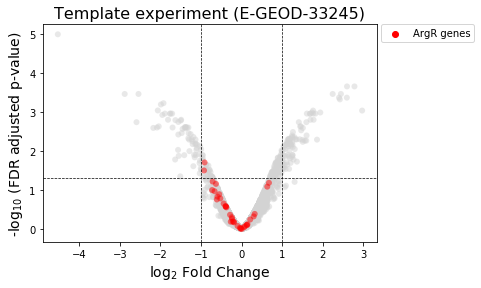

In [9]:
make_volcano_template_highlight_genelist(
    template_summary_filename,
    project_id,
    "adj.P.Val",
    argR_genes,
    os.path.join(local_dir, f"template_traditional_volcano_ArgR_{project_id}.svg"),
)

## logFC vs z-score

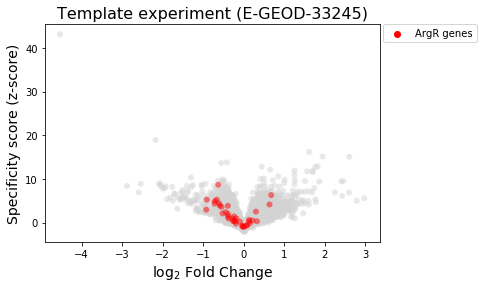

In [10]:
make_volcano_template_highlight_genelist(
    template_summary_filename,
    project_id,
    "z-score",
    argR_genes,
    os.path.join(local_dir, f"template_zscore_volcano_ArgR_{project_id}.svg"),
)

## logFC vs z-score difference

In [11]:
# Load summary tables for cbrB vs WT and crc vs WT
cbrB_summary_filename = os.path.join(
    base_dir, dataset_name, f"generic_gene_summary_{project_id}_cbrB_v_WT.tsv"
)
crc_summary_filename = os.path.join(
    base_dir, dataset_name, f"generic_gene_summary_{project_id}_crc_v_WT.tsv"
)

In [12]:
# Read summary tables
cbrB_summary_df = pd.read_csv(cbrB_summary_filename, sep="\t", index_col=0, header=0)
crc_summary_df = pd.read_csv(crc_summary_filename, sep="\t", index_col=0, header=0)

In [13]:
cbrB_summary_df.head()

,Gene ID,Adj P-value (Real),Rank (Real),abs(logFC) (Real),logFC (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated),Percent DE (simulated),Mean abs(logFC) (simulated),Std deviation (simulated),Number of experiments (simulated),Z score,Gene Name
PA4726,PA4726,0.000010,5549.0,4.530917,-4.530917,0.846422,4845.5,87.319755,0.0,0.16708,0.101184,25,43.127565,cbrB
PA1985,PA1985,0.000926,5548.0,2.973309,2.973309,0.492811,5521.0,99.495314,0.0,0.57848,0.431375,25,5.551615,pqqA
PA4131,PA4131,0.000348,5547.0,2.881690,-2.881690,0.759862,5492.0,98.972603,0.0,0.42570,0.292152,25,8.406546,NaN
PA4739,PA4739,0.000223,5546.0,2.784541,2.784541,0.623753,5524.0,99.549387,0.0,0.55206,0.446732,25,4.997361,NaN
PA1216,PA1216,0.000223,5545.0,2.600594,2.600594,0.832988,3823.5,68.898702,0.0,0.19604,0.159747,25,15.052271,NaN


In [14]:
crc_summary_df.head()

,Gene ID,Adj P-value (Real),Rank (Real),abs(logFC) (Real),logFC (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated),Percent DE (simulated),Mean abs(logFC) (simulated),Std deviation (simulated),Number of experiments (simulated),Z score,Gene Name
PA5530,PA5530,0.000084,5549.0,4.255347,4.255347,0.765355,5163.0,93.042538,0.0,0.38940,0.268546,25,14.395832,NaN
PA0523,PA0523,0.001262,5548.0,3.558095,-3.558095,0.807052,5277.0,95.097332,0.0,0.45394,0.287844,25,10.784173,norC
PA0524,PA0524,0.001262,5547.0,3.258857,-3.258857,0.807052,5324.5,95.953497,0.0,0.51870,0.294627,25,9.300414,norB
PA5332,PA5332,0.052347,5546.0,2.937954,-2.937954,0.956274,1794.0,32.317952,0.0,0.08718,0.068504,25,41.614836,crc
PA3874,PA3874,0.006108,5545.0,2.822931,-2.822931,0.807052,5372.0,96.809661,0.0,0.48364,0.248681,25,9.406812,narH


In [15]:
# Select logFC(Real) and z score columns
cbrB_select = cbrB_summary_df[["Gene Name", "logFC (Real)", "Z score"]]
crc_select = crc_summary_df[["logFC (Real)", "Z score"]]

In [16]:
print(cbrB_select.shape)
print(crc_select.shape)

(5549, 3)
(5549, 2)


In [17]:
# Merge on gene id
cbrB_crc_df = cbrB_select.merge(
    crc_select, left_index=True, right_index=True, suffixes=["_cbrB", "_crc"]
)
print(cbrB_crc_df.shape)
cbrB_crc_df.head()

(5549, 5)


,Gene Name,logFC (Real)_cbrB,Z score_cbrB,logFC (Real)_crc,Z score_crc
PA4726,cbrB,-4.530917,43.127565,0.210830,0.749115
PA1985,pqqA,2.973309,5.551615,-0.302693,-0.240528
PA4131,NaN,-2.881690,8.406546,-2.796261,4.148919
PA4739,NaN,2.784541,4.997361,-0.003459,-2.039124
PA1216,NaN,2.600594,15.052271,0.118840,-1.507215


In [18]:
# Calculate the difference in z score
cbrB_crc_df["diff z-score (cbrB-crc)"] = (
    cbrB_crc_df["Z score_cbrB"] - cbrB_crc_df["Z score_crc"]
)
cbrB_crc_df.head()

,Gene Name,logFC (Real)_cbrB,Z score_cbrB,logFC (Real)_crc,Z score_crc,diff z-score (cbrB-crc)
PA4726,cbrB,-4.530917,43.127565,0.210830,0.749115,42.378451
PA1985,pqqA,2.973309,5.551615,-0.302693,-0.240528,5.792143
PA4131,NaN,-2.881690,8.406546,-2.796261,4.148919,4.257627
PA4739,NaN,2.784541,4.997361,-0.003459,-2.039124,7.036485
PA1216,NaN,2.600594,15.052271,0.118840,-1.507215,16.559485


In [19]:
# Label genes in input list
cbrB_crc_df["gene group"] = "none"
cbrB_crc_df.loc[argR_genes, "gene group"] = "ArgR genes"

In [20]:
cbrB_crc_df.head()

,Gene Name,logFC (Real)_cbrB,Z score_cbrB,logFC (Real)_crc,Z score_crc,diff z-score (cbrB-crc),gene group
PA4726,cbrB,-4.530917,43.127565,0.210830,0.749115,42.378451,none
PA1985,pqqA,2.973309,5.551615,-0.302693,-0.240528,5.792143,none
PA4131,NaN,-2.881690,8.406546,-2.796261,4.148919,4.257627,none
PA4739,NaN,2.784541,4.997361,-0.003459,-2.039124,7.036485,none
PA1216,NaN,2.600594,15.052271,0.118840,-1.507215,16.559485,none


Text(0, 0.5, 'cbrB z-score - crc z-score')

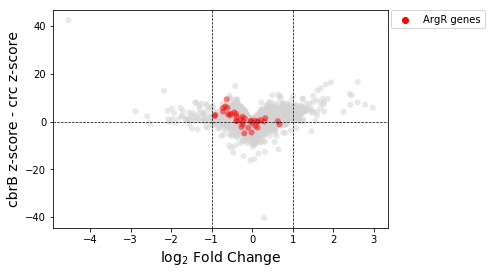

In [21]:
# Plot
h = sns.scatterplot(
    data=cbrB_crc_df[cbrB_crc_df["gene group"] == "none"],
    x="logFC (Real)_cbrB",
    y="diff z-score (cbrB-crc)",
    hue="gene group",
    alpha=0.5,
    palette=["lightgrey"],
    linewidth=0,
    legend=False,
)
h = sns.scatterplot(
    data=cbrB_crc_df[cbrB_crc_df["gene group"] == "ArgR genes"],
    x="logFC (Real)_cbrB",
    y="diff z-score (cbrB-crc)",
    hue="gene group",
    alpha=0.5,
    palette=["red"],
    linewidth=0,
)

# Add traditional thresholds
h.axhline(0.0, c="black", lw=0.7, ls="--")
h.axvline(1, c="black", lw=0.7, ls="--")
h.axvline(-1, c="black", lw=0.7, ls="--")

# Move location of legend
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0)

h.set_xlabel(r"log$_{2}$ Fold Change", fontsize=14, fontname="Verdana")
h.set_ylabel("cbrB z-score - crc z-score", fontsize=14, fontname="Verdana")

In [22]:
# Save
h.figure.savefig(
    "cbrB_crc_zscore_compare.svg",
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)